# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape) # training set
print('Test data:', X_test.shape, y_test.shape) # validation set

11493376/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## EDA

In [ ]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

In [ ]:
images.shape

(30, 28, 28)

In [ ]:
labels.shape

(30,)

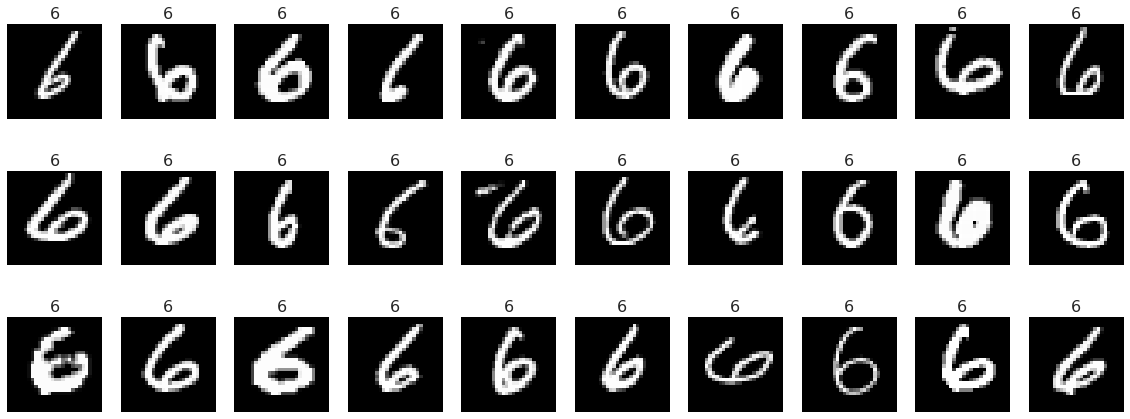

In [ ]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(6, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

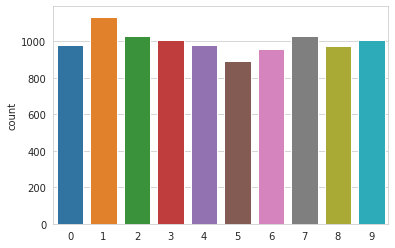

In [ ]:

sns.countplot(y_test)

## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

In [ ]:
n_samples = 2000
n_test_samples = 400
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)
print(X_train_flat.shape,X_test_flat.shape)
# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

(2000, 28, 28) (400, 28, 28)


In [ ]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (2000, 784)
Test data (400, 784)


In [ ]:
# Get all the data
# Run it after you finish training with the 2000 samples
# X_train_flat = X_train.reshape((-1, 784))
# X_test_flat = X_test.reshape((-1, 784))
# y_train_flat = y_train
# y_test_flat = y_test

# print('Training data', X_train_flat.shape)
# print('Test data', X_test_flat.shape)
# print('Training label', y_train_flat.shape)
# print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


## Train models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

In [ ]:

clf = SVC()

In [ ]:
param_grid = {'kernel':['linear', 'rbf'], 'C':np.logspace(-4,4,9)}

You can use GridSearch to find the best set of hyperparameters. Take a look at GridSearchCV from Sklearn here (look at the example at the end): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:


gridsearch_models = GridSearchCV(clf, param_grid=param_grid,n_jobs=-1,verbose=True,cv = 5)

gridsearch_models.fit(X_train_flat, y_train_flat)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
# print out the results
pd.DataFrame(gridsearch_models.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.596449,0.017164,0.851748,0.025195,0.0001,linear,"{'C': 0.0001, 'kernel': 'linear'}",0.1150,0.1150,0.1150,0.1150,0.1125,0.1145,0.001000,15
1,5.750710,0.022553,0.894809,0.019619,0.0001,rbf,"{'C': 0.0001, 'kernel': 'rbf'}",0.1150,0.1150,0.1150,0.1150,0.1125,0.1145,0.001000,15
2,3.861721,0.041579,0.776085,0.013695,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.8150,0.7800,0.8075,0.7950,0.7750,0.7945,0.015362,14
3,5.827939,0.013977,0.844666,0.007390,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.1150,0.1150,0.1150,0.1150,0.1125,0.1145,0.001000,15
4,1.694601,0.009114,0.510340,0.010045,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.9200,0.8825,0.9075,0.9025,0.8950,0.9015,0.012510,6
5,5.790375,0.016417,0.872453,0.015314,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.1150,0.1150,0.1150,0.1150,0.1125,0.1145,0.001000,15
6,1.189469,0.014180,0.410437,0.005432,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.9350,0.8825,0.9050,0.8800,0.8700,0.8945,0.023259,7
7,4.255578,0.024987,0.777032,0.007455,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.8400,0.7975,0.8275,0.7925,0.7925,0.8100,0.019875,13
8,1.187202,0.018966,0.409378,0.002108,1,linear,"{'C': 1.0, 'kernel': 'linear'}",0.9200,0.8850,0.8975,0.8725,0.8675,0.8885,0.018881,8
9,2.251166,0.017022,0.570828,0.010298,1,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.9475,0.9200,0.9425,0.9200,0.9200,0.9300,0.012349,5


In [ ]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10.0, 'kernel': 'rbf'}
Best score 0.9400000000000001


In [ ]:
best_model = gridsearch_models.best_estimator_

## Evaluation

**Get the predictions on test data**

In [ ]:

predictions = best_model.predict(X_test_flat) # predictions on test set
print('Accuracy Score on Test:', accuracy_score(y_test_flat, predictions))

Accuracy Score on Test: 0.935


In [ ]:
predictions_train = best_model.predict(X_train_flat) # predictions on test set
print('Accuracy Score on Train:', accuracy_score(y_train_flat, predictions_train))

Accuracy Score on Train: 1.0


In [ ]:
print('\t\tClassification Report on Test \n',classification_report(y_test_flat,predictions))

		Classification Report on Test 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        44
           2       0.93      0.87      0.90        47
           3       0.92      0.95      0.94        38
           4       0.95      1.00      0.97        38
           5       0.90      0.90      0.90        30
           6       0.97      0.97      0.97        37
           7       0.96      0.92      0.94        53
           8       0.86      0.94      0.90        32
           9       0.95      0.93      0.94        43

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400



In [ ]:
print('\t\tClassification Report on Train \n',classification_report(y_train_flat,predictions_train))

		Classification Report on Train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       194
           3       1.00      1.00      1.00       229
           4       1.00      1.00      1.00       173
           5       1.00      1.00      1.00       151
           6       1.00      1.00      1.00       201
           7       1.00      1.00      1.00       212
           8       1.00      1.00      1.00       207
           9       1.00      1.00      1.00       223

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**Plot the confusion matrix in form of a heatmap**

In [ ]:
sns.set_theme('paper',palette='bright')

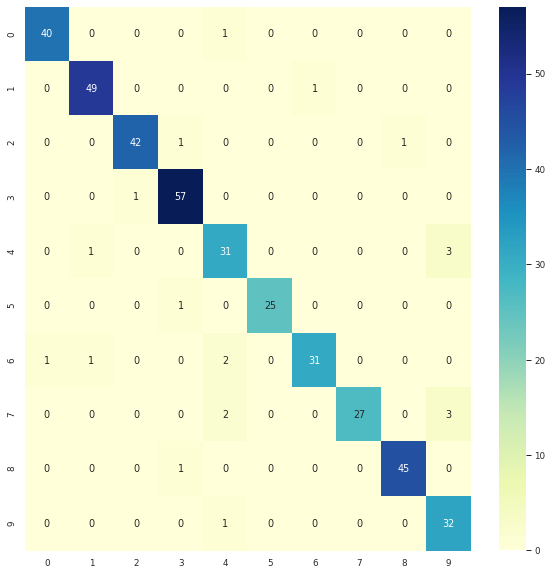

In [ ]:
# Your code here
plt.figure(figsize=(10,10))
# use sns.heatmap and sklearn's confusion_matrix
sns.heatmap(confusion_matrix(y_test_flat,predictions),annot=True,cmap="YlGnBu")
plt.show()

**Plot the samples that the model predicts incorrectly**

In [ ]:
False_digit = predictions[y_test_flat != predictions]

In [ ]:
False_Image = X_test_flat[y_test_flat != predictions]

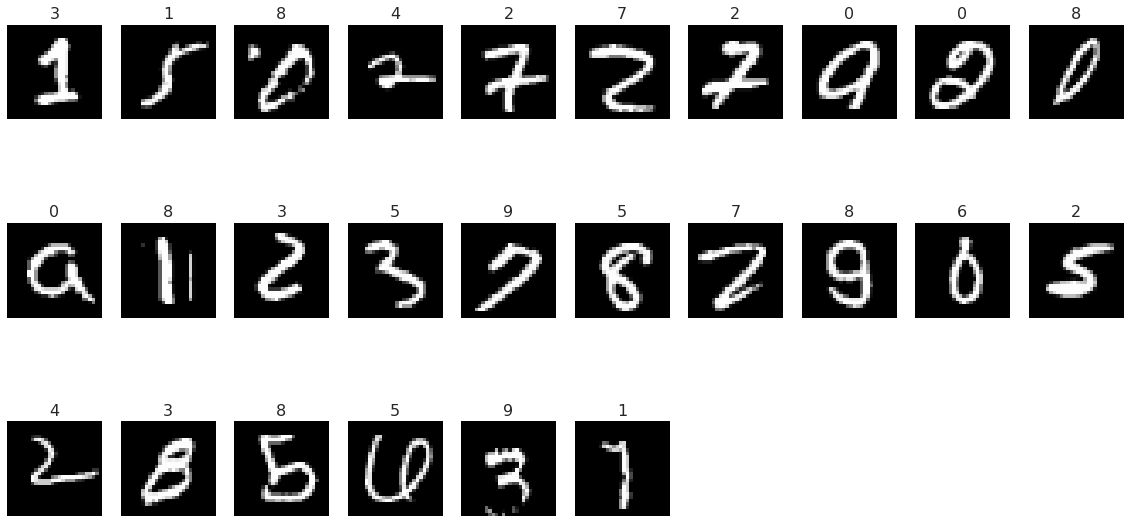

In [ ]:
plot_images(False_Image.reshape((-1, 28,28)), False_digit)

## Save model

In [ ]:
import pickle

pickle.dump(best_model, open('svm_mnist.pkl', 'wb'))

**Re-load model for testing**

In [ ]:
# Your code here
with open('svm_mnist.pkl', 'rb') as model:
      reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.935
